In [2]:
from wrangle_data_funcs import *
from modelling_funcs import *
from predict_gw_scores import *
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [3]:
training_year, training_n_gws, pred_year, pred_gw, alpha, features, model, output = get_params()
features = [
        'assists', 'bonus', 'bps', 'clean_sheets', 'goals_conceded',
        'goals_scored', 'influence', 'creativity', 'threat', 'ict_index',
        'minutes', 'ewma_total_points', 
        'ewma_team_goals', 
        'ewma_team_points',
        'ewma_team_goals_nw_opponent', 
        'ewma_team_points_nw_opponent'
        ]
training_df = get_training_df(training_year, training_n_gws, alpha)
test_model(training_df, features, model)
prediction_df = get_prediction_df(pred_year, pred_gw, alpha)

# pred_df.to_csv(f"{output}.csv", index=False)
# pred_df_simple.to_csv(f'{output}_simple.csv', index=False)


{'GK': 2.0962160119369107, 'DEF': 2.139696670607732, 'MID': 2.2385495433720948, 'FWD': 2.7362624499192445}


In [4]:
prediction_df.query('full_name in ["gianluigi_donnarumma", "josko_gvardiol", "phil_foden", "erling_haaland"]')
# prediction_df.iloc[[207, 243, 378, 586], 40] = 20

full_name  gw  total_points position      team  opponent_team  \
207        erling_haaland   6            16      FWD  Man City              3   
243  gianluigi_donnarumma   6             2       GK  Man City              3   
378        josko_gvardiol   6             2      DEF  Man City              3   
586            phil_foden   6             1      MID  Man City              3   

           xP  assists    bonus       bps  ...  transfers_out      value  \
207  9.459705      0.3  2.78391  48.03271  ...    94247.13543  141.56990   
243  4.140000      0.0  0.00000  15.71000  ...    25944.36000   55.30000   
378  2.260500      0.0  0.00000  10.79400  ...    81054.98016   58.51107   
586  3.930967      0.0  0.29400  11.41524  ...    27845.26470   80.30000   

     yellow_cards  opponent_team_name  ewma_team_goals  ewma_team_points  \
207          0.00             Burnley          2.92618           2.05521   
243          0.21             Burnley          2.92618           2.05521   
378          0.00             Burnley          2.92618           2.05521   
586          0.30             Burnley          2.92618           2.05521   

     team_name_nw_opponent  team_nw_opponent  ewma_team_goals_nw_opponent  \
207              Brentford         Brentford                        1.747   
243              Brentford         Brentford                        1.747   
378              Brentford         Brentford                        1.747   
586              Brentford         Brentford                        1.747   

     ewma_team_points_nw_opponent  
207                       1.26309  
243                       1.26309  
378                       1.26309  
586                       1.26309  

[4 rows x 41 columns]

In [5]:
prediction_df1  = prediction_df.copy()
prediction_df2  = prediction_df.copy()
prediction_df3  = prediction_df.copy()

prediction_df2.iloc[[207, 243, 378, 586], 7] = 200
# prediction_df3.iloc[[207, 243, 378, 586], 40] = 20

In [6]:
pred_df1 = train_full_model(training_df, features, prediction_df1, model)
pred_df1 = merge_ownership_data(pred_df1)
pred_df1_simple = pred_df1[['full_name', 'position', 'team', 'ewma_total_points', 'predicted_points', 'owner']]

In [7]:
pred_df2 = train_full_model(training_df, features, prediction_df2, model)
pred_df2 = merge_ownership_data(pred_df2)
pred_df2_simple = pred_df2[['full_name', 'position', 'team', 'ewma_total_points', 'predicted_points', 'owner']]

In [8]:
pred_df3 = train_full_model(training_df, features, prediction_df3, model)
pred_df3 = merge_ownership_data(pred_df3)
pred_df3_simple = pred_df3[['full_name', 'position', 'team', 'ewma_total_points', 'predicted_points', 'owner']]

In [9]:
pred_df1_simple.query('full_name in ["gianluigi_donnarumma", "josko_gvardiol", "phil_foden", "erling_haaland"]')

full_name position      team  ewma_total_points  \
207        erling_haaland      FWD  Man City           11.85607   
243  gianluigi_donnarumma       GK  Man City            3.75000   
378        josko_gvardiol      DEF  Man City            2.32200   
586            phil_foden      MID  Man City            2.76603   

     predicted_points    owner  
207          4.177528  88376.0  
243          3.994271  85076.0  
378          2.261616  85076.0  
586          2.478775  88376.0

In [10]:
pred_df2_simple.query('full_name in ["gianluigi_donnarumma", "josko_gvardiol", "phil_foden", "erling_haaland"]')

full_name position      team  ewma_total_points  \
207        erling_haaland      FWD  Man City           11.85607   
243  gianluigi_donnarumma       GK  Man City            3.75000   
378        josko_gvardiol      DEF  Man City            2.32200   
586            phil_foden      MID  Man City            2.76603   

     predicted_points    owner  
207       -764.976284  88376.0  
243       -127.903164  85076.0  
378       -243.360590  85076.0  
586       -311.545288  88376.0

In [11]:
pred_df3_simple.query('full_name in ["gianluigi_donnarumma", "josko_gvardiol", "phil_foden", "erling_haaland"]')

full_name position      team  ewma_total_points  \
207        erling_haaland      FWD  Man City           11.85607   
243  gianluigi_donnarumma       GK  Man City            3.75000   
378        josko_gvardiol      DEF  Man City            2.32200   
586            phil_foden      MID  Man City            2.76603   

     predicted_points    owner  
207          5.551012  88376.0  
243          3.994271  85076.0  
378          2.261616  85076.0  
586          2.478775  88376.0

# Checking coeffs

In [12]:
def train_full_model(training_df, features, prediction_df, model_func):
    model_dict, _ = create_model(training_df, features, model_func, test=False)
    pred_df = predict_scores(prediction_df.dropna(), features, model_dict)
    return pred_df, model_dict

In [13]:
training_year, training_n_gws, pred_year, pred_gw, alpha, features, model_func, output = get_params()
features = [
        'assists', 'bonus', 'bps', 'clean_sheets', 'goals_conceded',
        'goals_scored', 'influence', 'creativity', 'threat', 'ict_index',
        'minutes', 'ewma_total_points', 
        'ewma_team_goals', 
        'ewma_team_points',
        'ewma_team_goals_nw_opponent', 
        'ewma_team_points_nw_opponent'
        ]
training_df = get_training_df(training_year, training_n_gws, alpha)
test_model(training_df, features, model_func)
prediction_df = get_prediction_df(pred_year, pred_gw, alpha)
pred_df, _ = train_full_model(training_df, features, prediction_df, model_func)
pred_df = merge_ownership_data(pred_df)
pred_df_simple = pred_df[['full_name', 'position', 'team', 'ewma_total_points', 'predicted_points', 'owner']]

{'GK': 2.0962160119369107, 'DEF': 2.139696670607732, 'MID': 2.2385495433720948, 'FWD': 2.7362624499192445}


In [14]:
pd.DataFrame({'GK': _['GK'].coef_,
              'DEF': _['DEF'].coef_,
              'MID': _['MID'].coef_,
              'FWD': _['FWD'].coef_}, index=features)['FWD']

assists                        -3.858424
bonus                          -0.930819
bps                            -0.043676
clean_sheets                   -0.241966
goals_conceded                 -0.225913
goals_scored                   -1.418438
influence                       0.148913
creativity                      0.231070
threat                          0.143442
ict_index                      -1.598732
minutes                         0.022351
ewma_total_points               1.094491
ewma_team_goals                -0.146353
ewma_team_points                0.197630
ewma_team_goals_nw_opponent    -0.074013
ewma_team_points_nw_opponent    0.111219
Name: FWD, dtype: float64

In [15]:
model = LinearRegression()

test1 = model

In [16]:
test1

LinearRegression()

In [17]:
# def main():
#     training_year, training_n_gws, pred_year, pred_gw, alpha, features, output = get_params()
#     training_df = get_training_df(training_year, training_n_gws, alpha)
#     test_model(training_df, features)
#     prediction_df = get_prediction_df(pred_year, pred_gw, alpha)
#     pred_df = train_full_model(training_df, features, prediction_df)
#     pred_df = merge_ownership_data(pred_df)
#     pred_df_simple = pred_df[['full_name', 'position', 'team', 'ewma_total_points', 'predicted_points', 'owner']]
#     pred_df.to_csv(f"{output}.csv", index=False)
#     pred_df_simple.to_csv(f'{output}_simple.csv', index=False)

# Drawing plots like I should've done ages ago

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
training_year, training_n_gws, pred_year, pred_gw, alpha, features, model, output = get_params()
features = [
        'assists', 'bonus', 'bps', 'clean_sheets', 'goals_conceded',
        'goals_scored', 'influence', 'creativity', 'threat', 'ict_index',
        'minutes', 'ewma_total_points', 
        'ewma_team_goals', 
        'ewma_team_points',
        'ewma_team_goals_nw_opponent', 
        'ewma_team_points_nw_opponent'
        ]
training_df = get_training_df(training_year, training_n_gws, alpha)
# test_model(training_df, features, model)
# prediction_df1 = get_prediction_df(pred_year, pred_gw, alpha)
# pred_df1 = train_full_model(training_df, features, prediction_df1, model)
# pred_df1 = merge_ownership_data(pred_df1)
# pred_df1_simple = pred_df1[['full_name', 'position', 'team', 'ewma_total_points', 'predicted_points', 'owner']]


In [21]:
training_df

full_name  gw  total_points position         team  \
15          aaron_cresswell   2             1      DEF     West Ham   
16          aaron_cresswell   3             0      DEF     West Ham   
17          aaron_cresswell   4             0      DEF     West Ham   
18          aaron_cresswell   5             1      DEF     West Ham   
19          aaron_cresswell   6             0      DEF     West Ham   
...                     ...  ..           ...      ...          ...   
27599  zain_silcott_duberry  33             0      MID  Bournemouth   
27600  zain_silcott_duberry  34             0      MID  Bournemouth   
27601  zain_silcott_duberry  35             0      MID  Bournemouth   
27602  zain_silcott_duberry  36             0      MID  Bournemouth   
27603  zain_silcott_duberry  37             0      MID  Bournemouth   

       opponent_team        xP  assists  bonus       bps  ...  transfers_out  \
15                 7  0.850000      0.0    0.0  0.900000  ...    5083.200000   
16                13  0.535000      0.0    0.0  0.630000  ...   13601.640000   
17                 9  0.404500      0.0    0.0  0.441000  ...   22199.148000   
18                 6  0.433150      0.0    0.0  1.208700  ...   18176.103600   
19                 4  0.393205      0.0    0.0  0.846090  ...   15826.472520   
...              ...       ...      ...    ...       ...  ...            ...   
27599              7  0.245416      0.0    0.0  0.042371  ...      23.626669   
27600             14  0.171791      0.0    0.0  0.029660  ...      21.638668   
27601              1 -0.179746      0.0    0.0  0.020762  ...      18.447068   
27602              2 -0.125822      0.0    0.0  0.014533  ...      16.812947   
27603             13 -0.238076      0.0    0.0  0.010173  ...      13.569063   

       value  yellow_cards  opponent_team_name  ewma_team_goals  \
15      40.0           0.0      Crystal Palace         1.300000   
16      40.0           0.0            Man City         1.210000   
17      40.0           0.0              Fulham         1.147000   
18      40.0           0.0             Chelsea         0.802900   
19      40.0           0.0           Brentford         0.862030   
...      ...           ...                 ...              ...   
27599   45.0           0.0      Crystal Palace         0.955095   
27600   45.0           0.0             Man Utd         0.968566   
27601   45.0           0.0             Arsenal         1.277996   
27602   45.0           0.0         Aston Villa         0.894598   
27603   45.0           0.0            Man City         0.926218   

       ewma_team_points  ewma_team_goals_nw_opponent  \
15             0.900000                     0.700000   
16             0.630000                     2.720000   
17             0.741000                     0.804000   
18             0.518700                     1.874400   
19             0.663090                     1.301840   
...                 ...                          ...   
27599          1.246272                     1.278901   
27600          1.172391                     0.768019   
27601          1.720673                     1.719443   
27602          1.204471                     1.836243   
27603          0.843130                     1.804044   

       ewma_team_points_nw_opponent  total_points_nw  opponent_nw  
15                         0.000000              0.0     Man City  
16                         3.000000              0.0       Fulham  
17                         0.951000              1.0      Chelsea  
18                         1.985700              0.0    Brentford  
19                         1.112910              1.0      Ipswich  
...                             ...              ...          ...  
27599                      1.433289              0.0      Man Utd  
27600                      0.711968              0.0      Arsenal  
27601                      1.413749              0.0  Aston Villa  
27602                      2.847459           

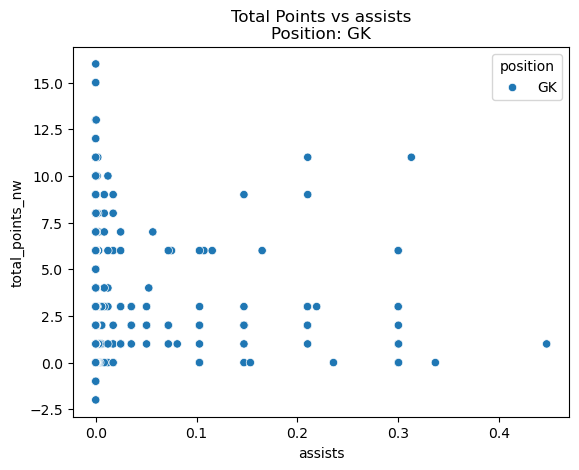

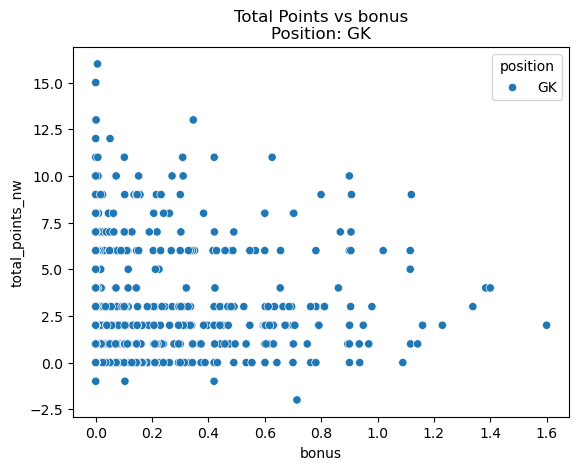

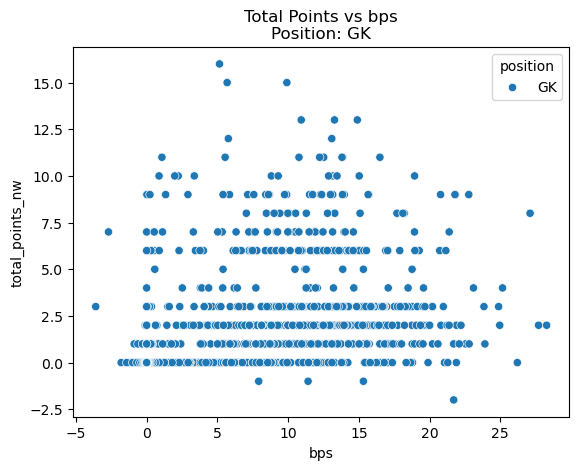

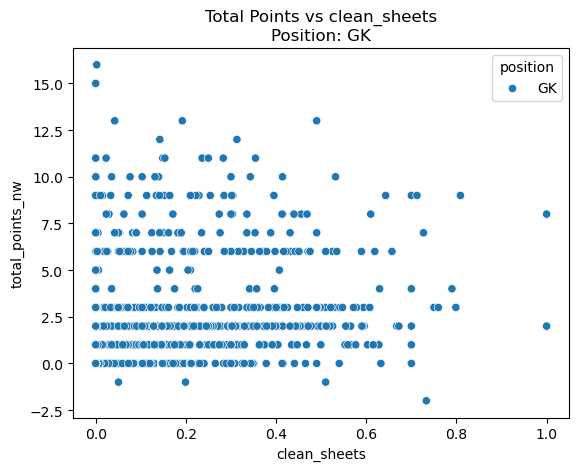

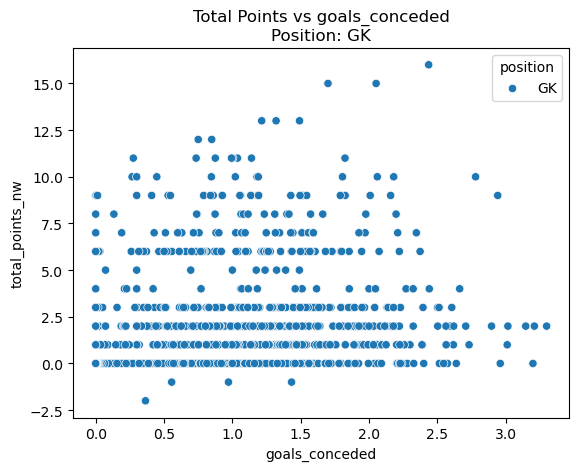

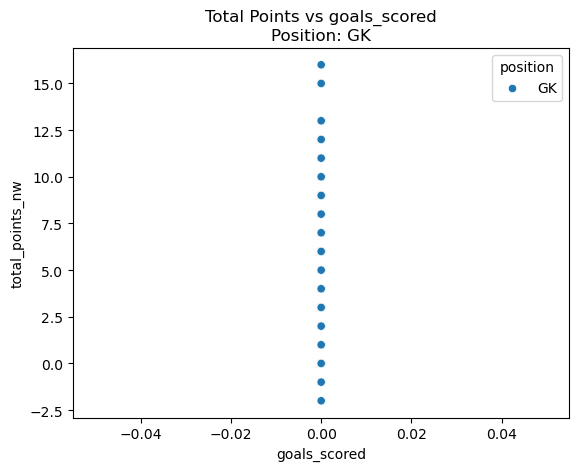

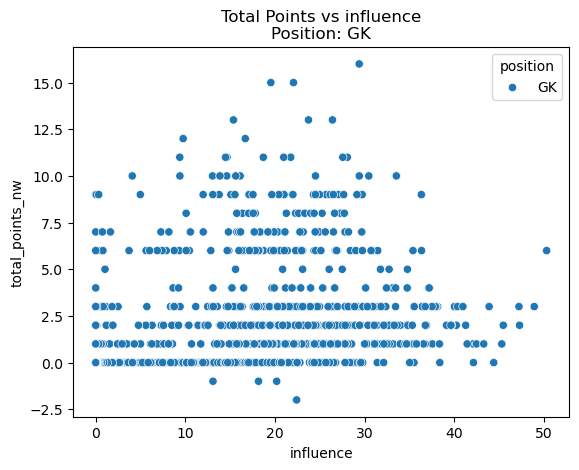

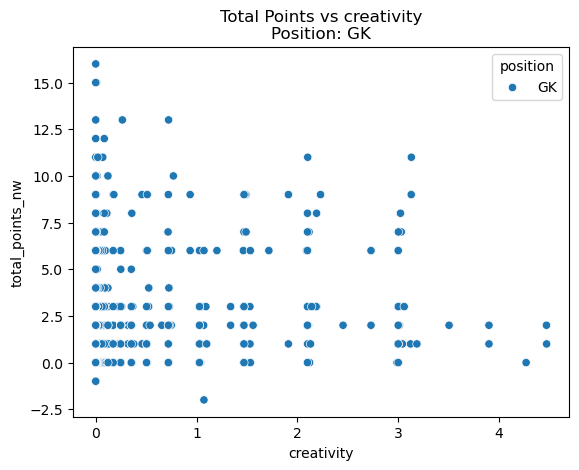

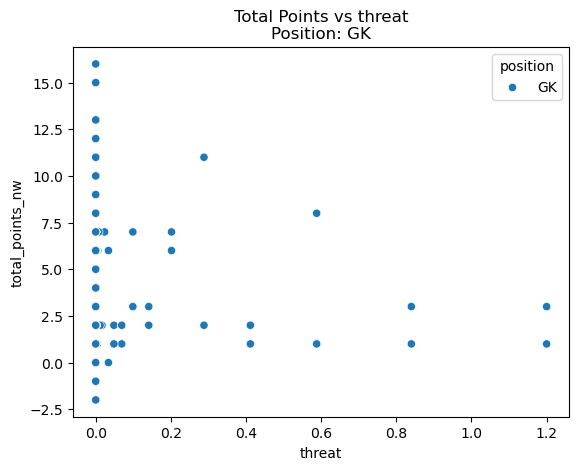

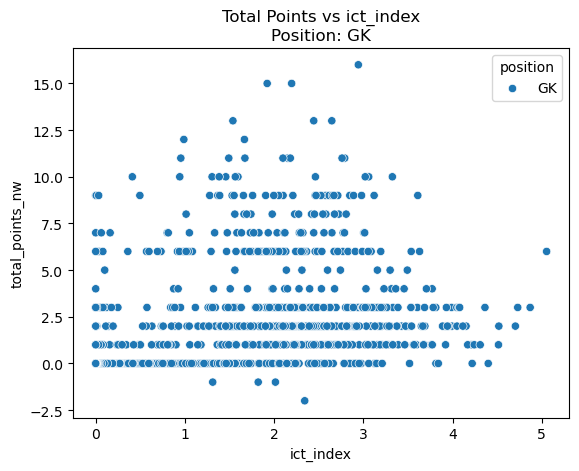

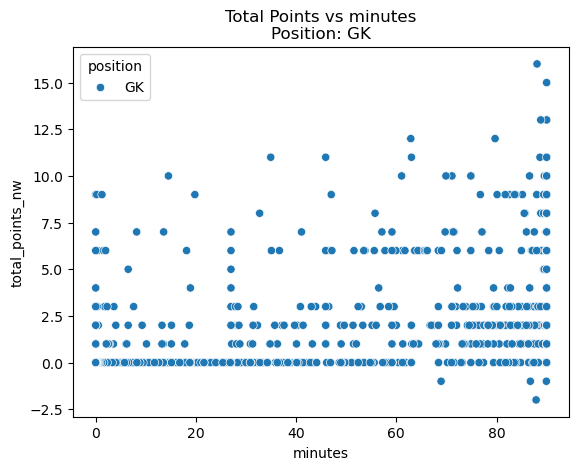

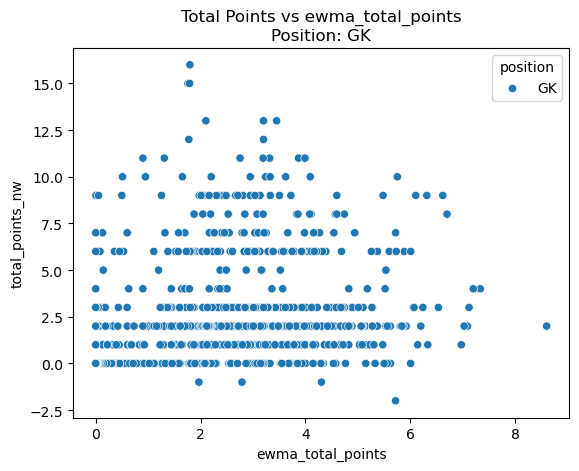

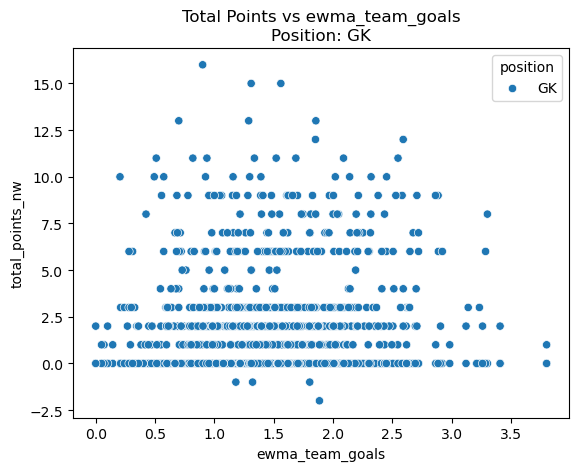

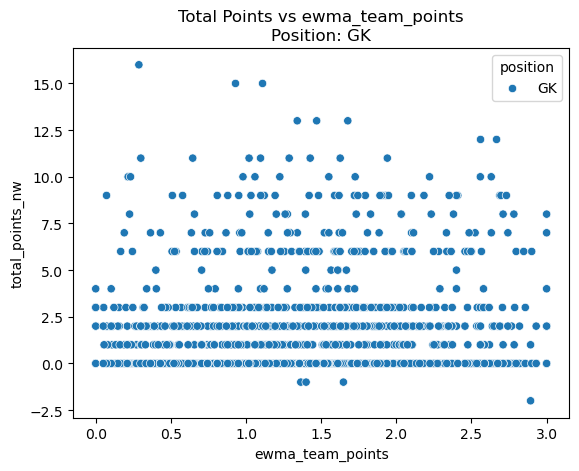

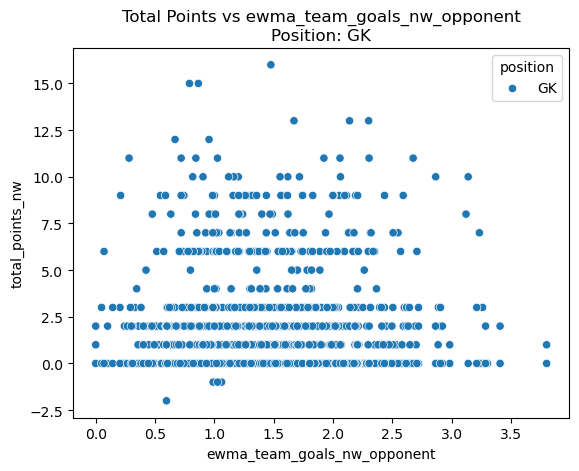

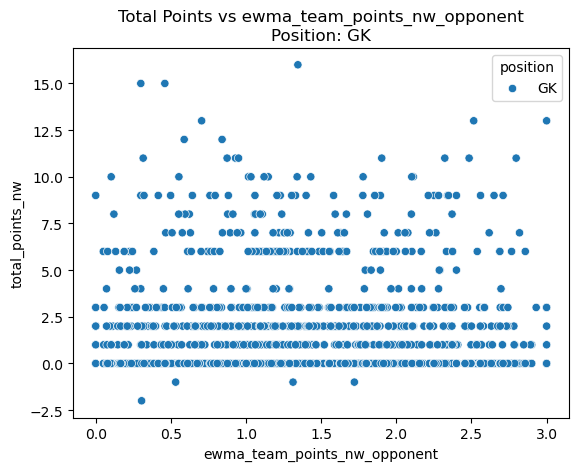

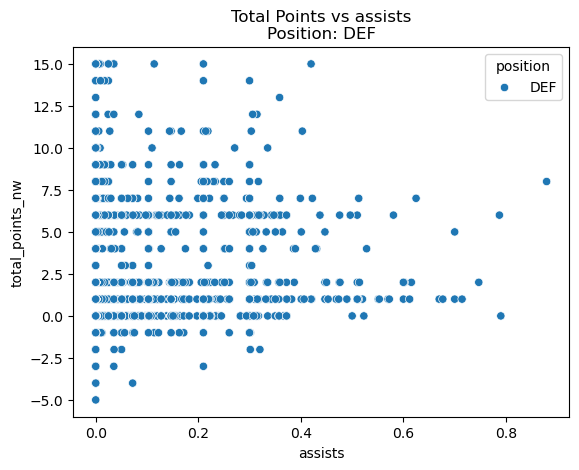

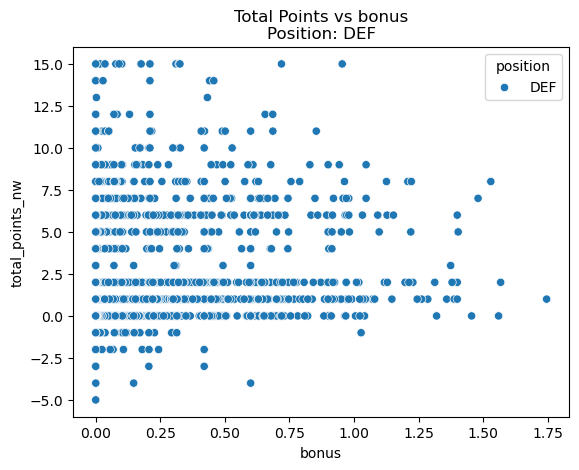

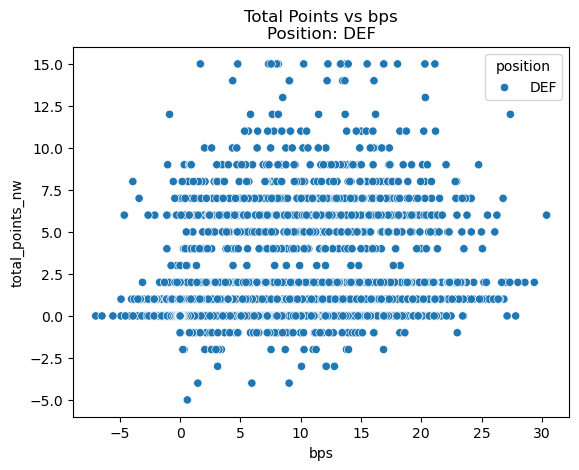

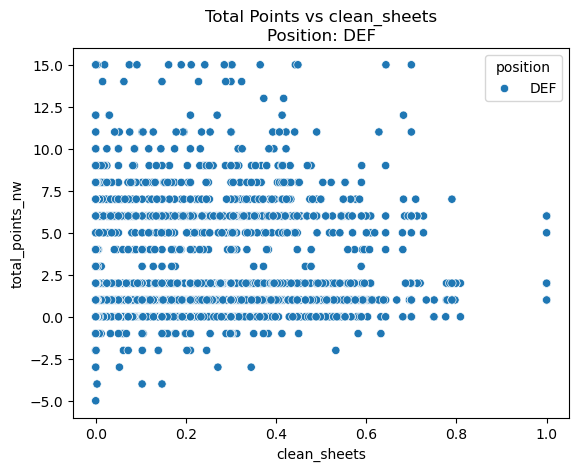

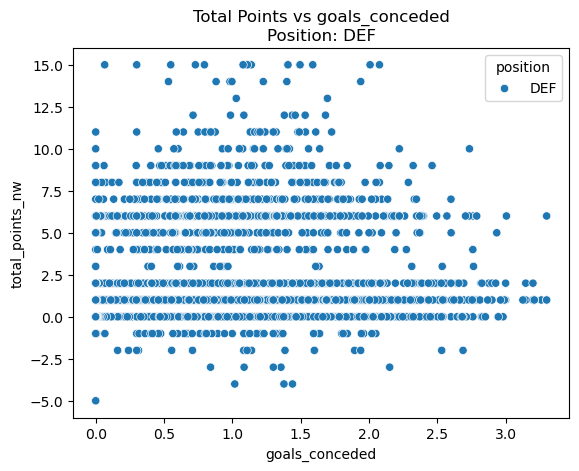

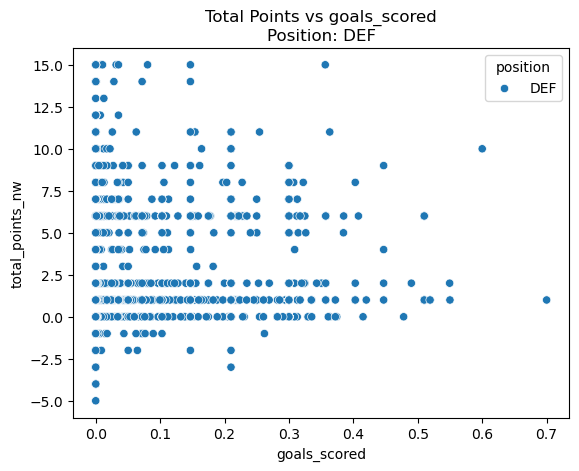

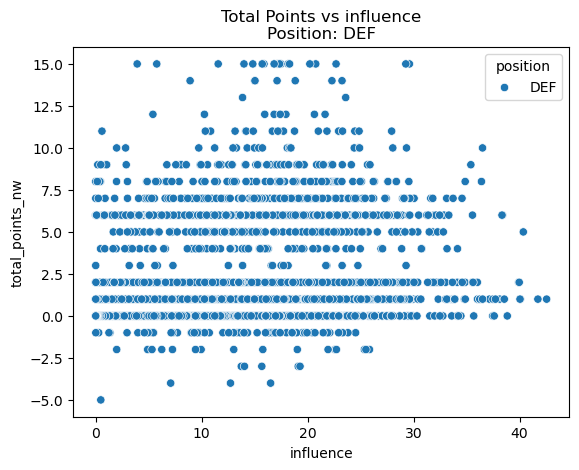

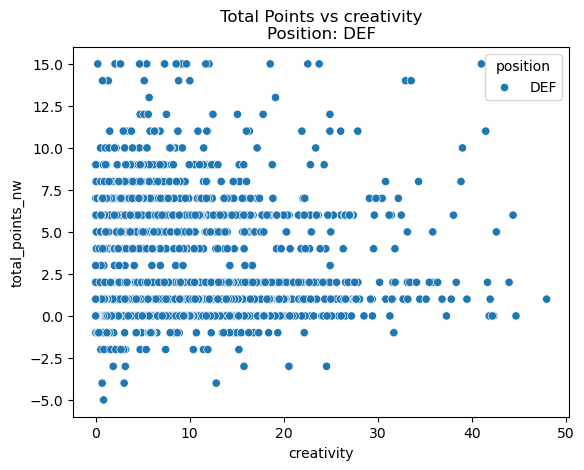

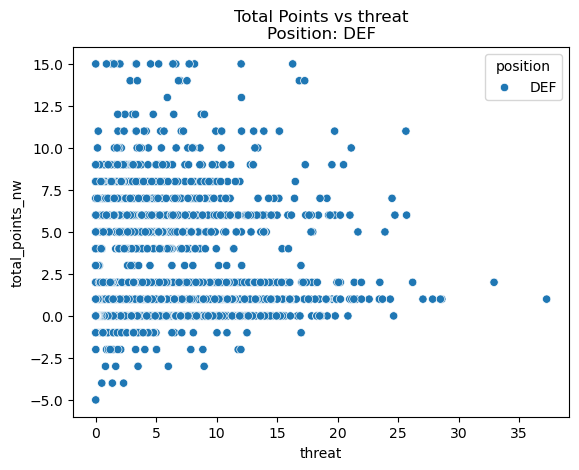

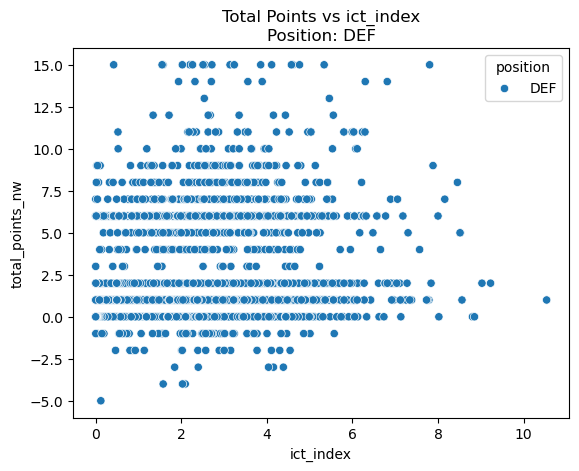

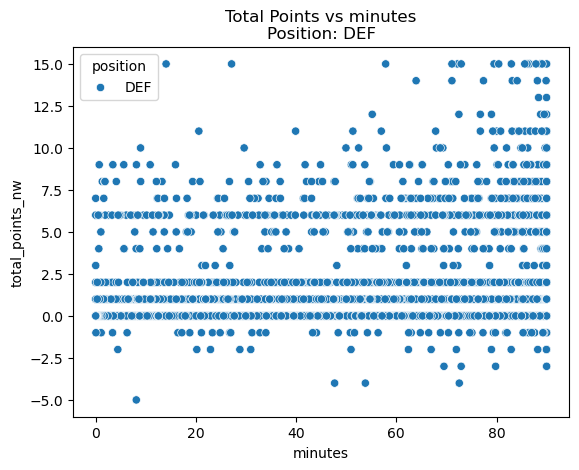

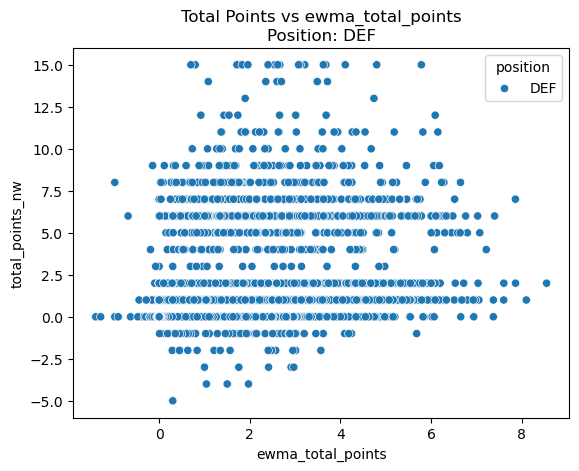

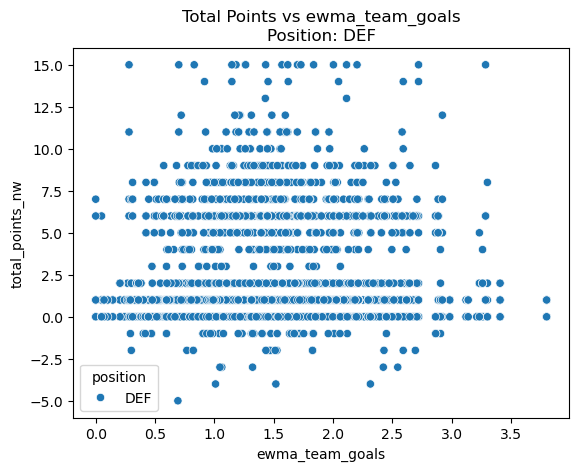

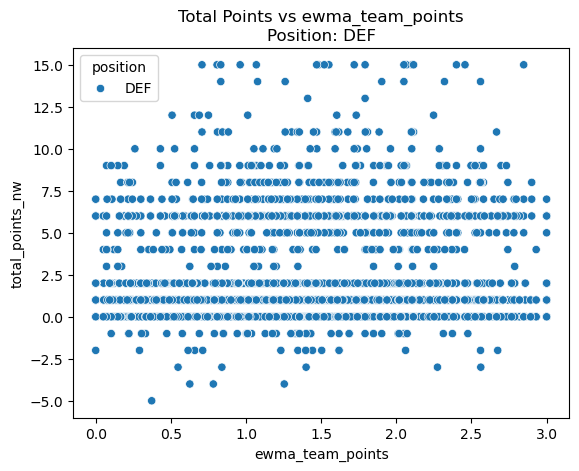

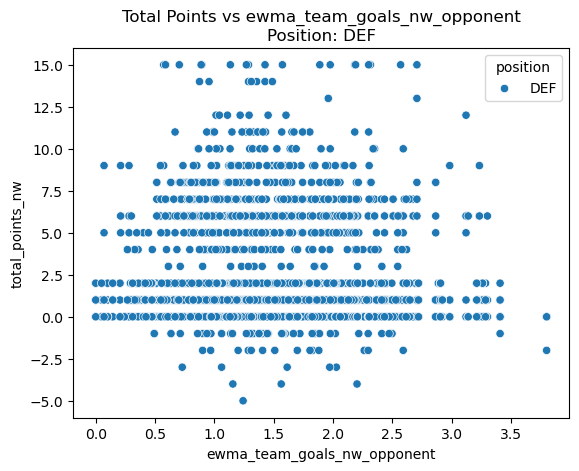

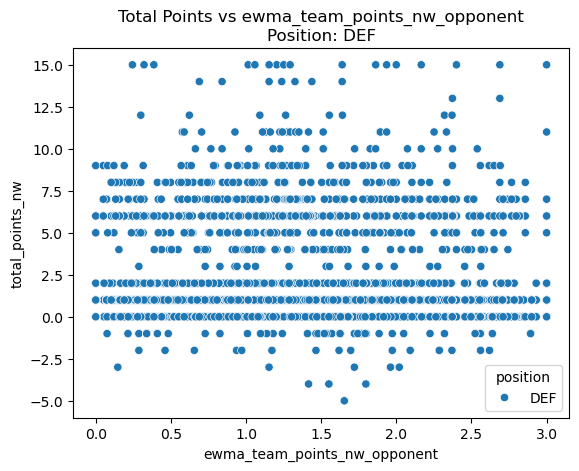

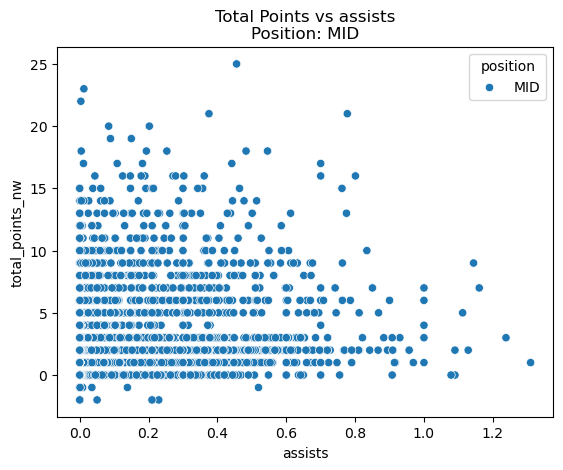

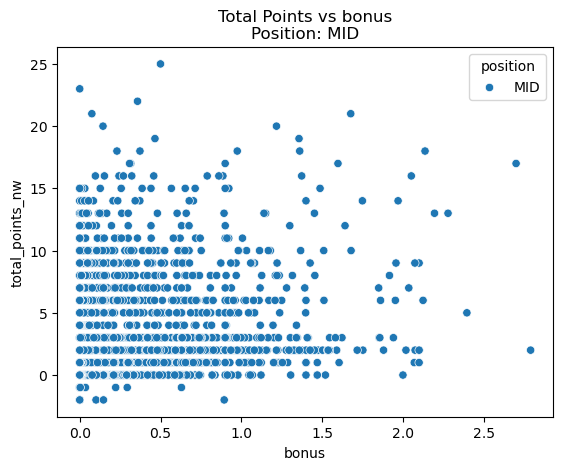

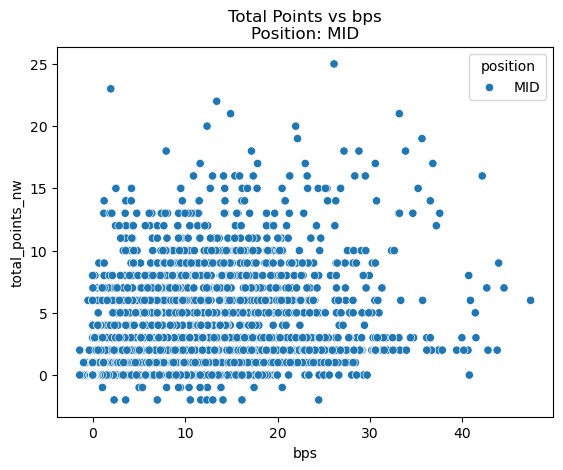

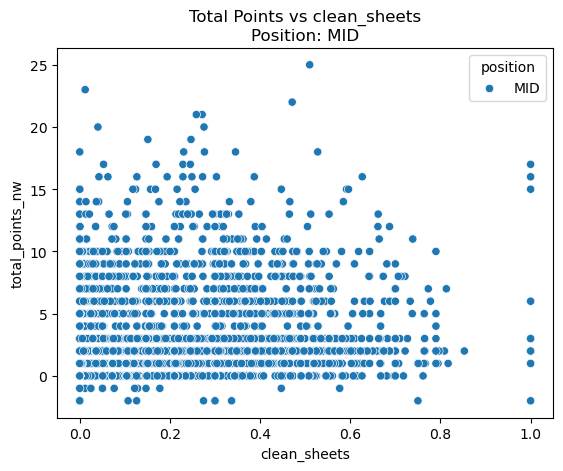

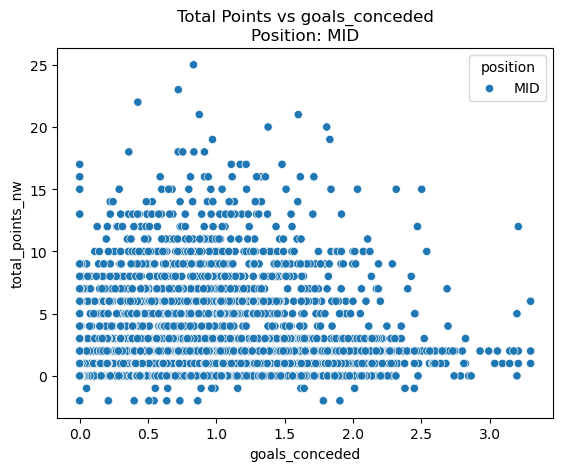

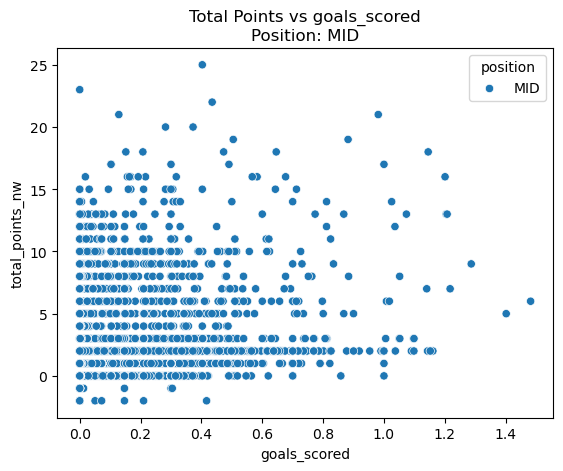

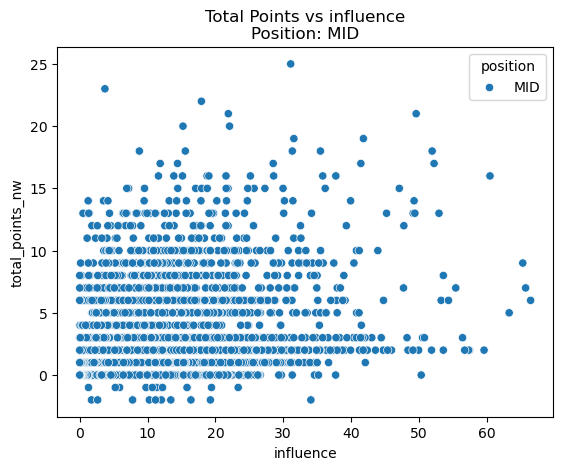

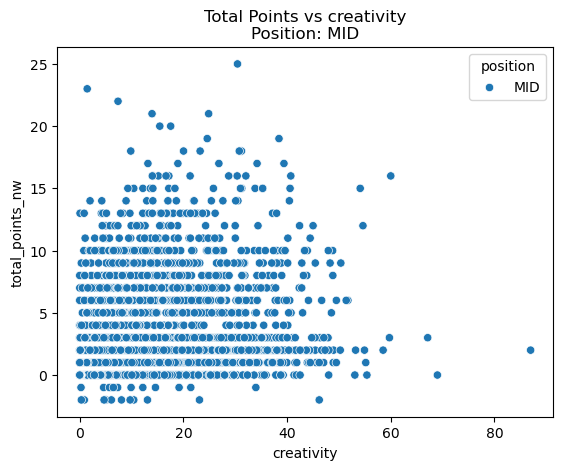

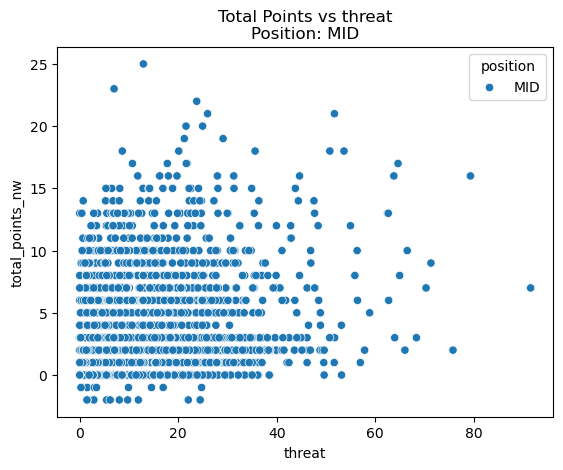

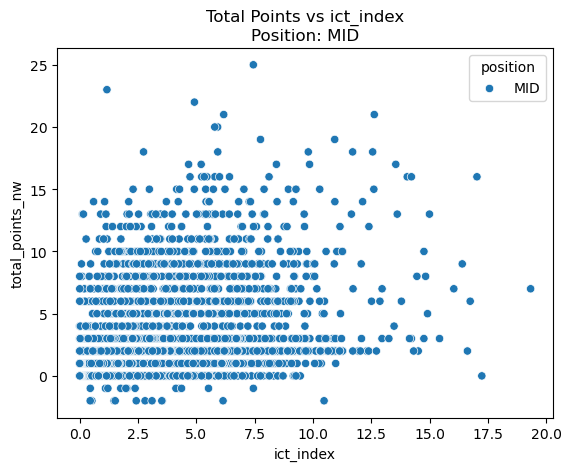

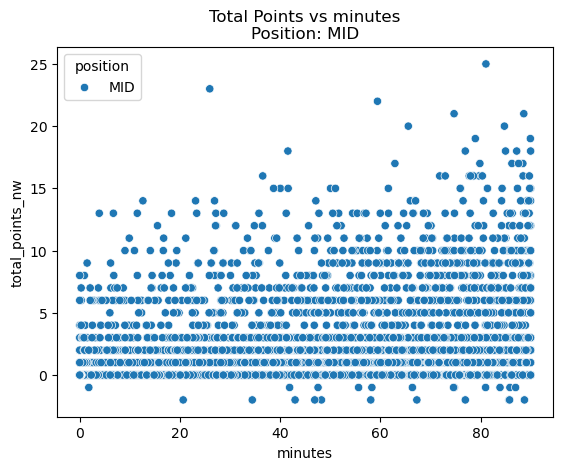

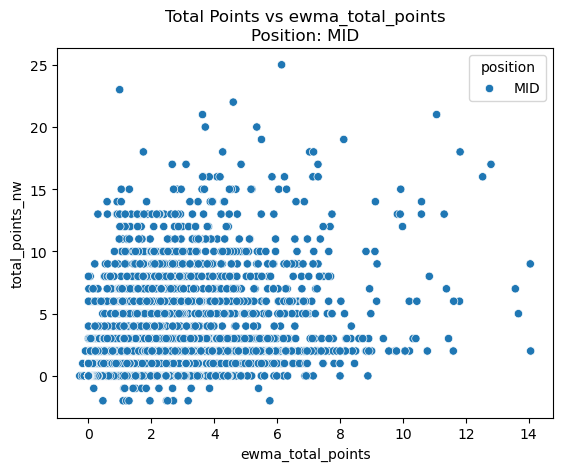

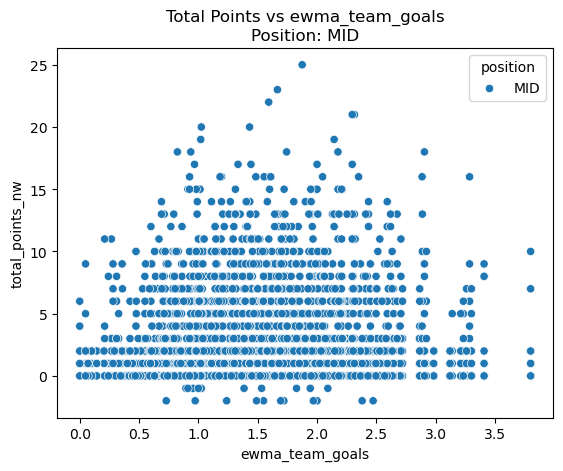

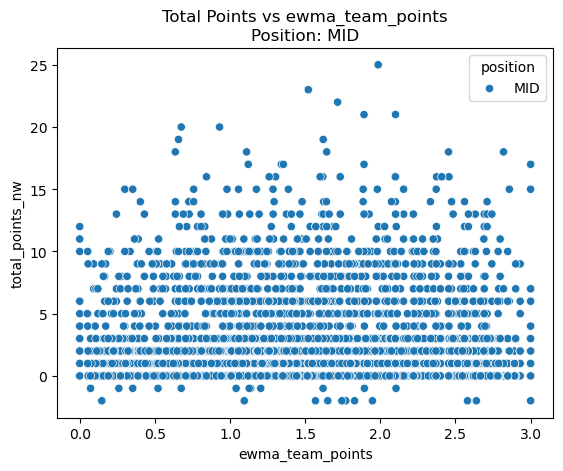

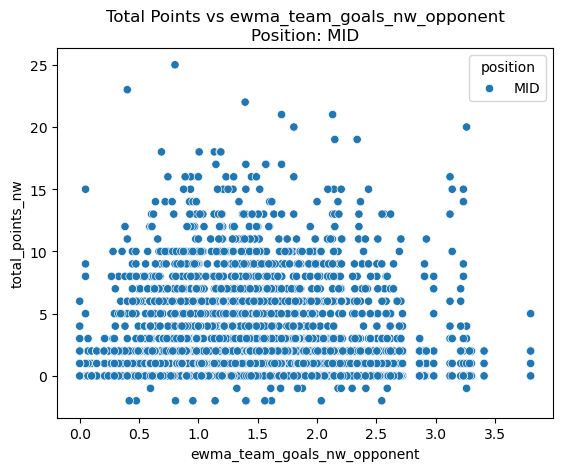

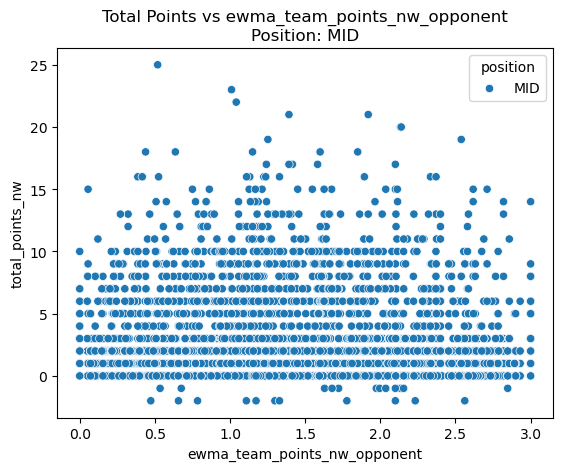

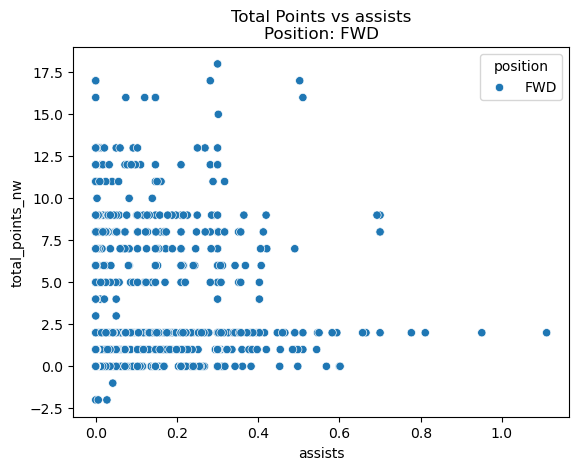

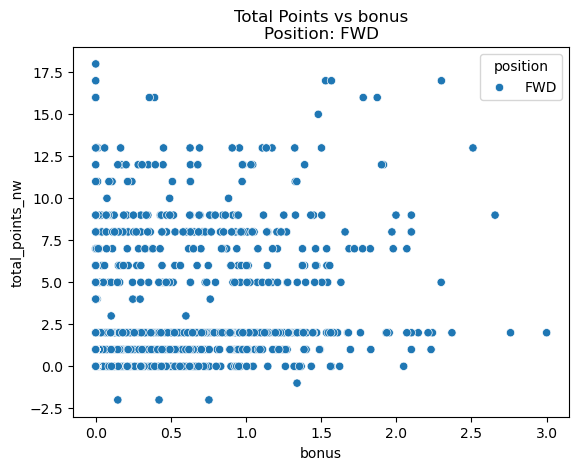

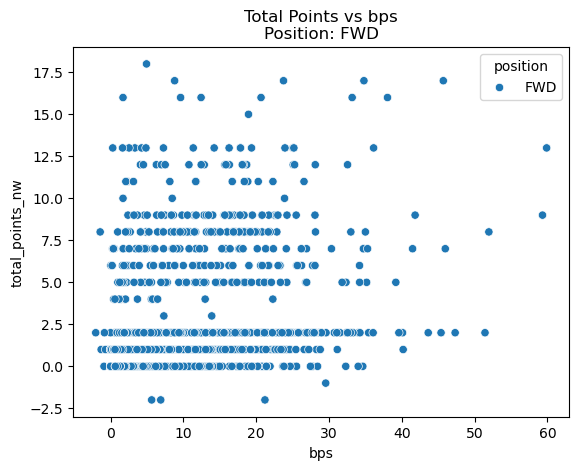

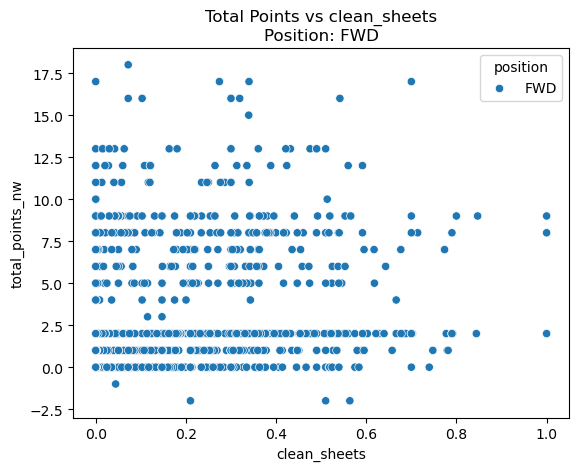

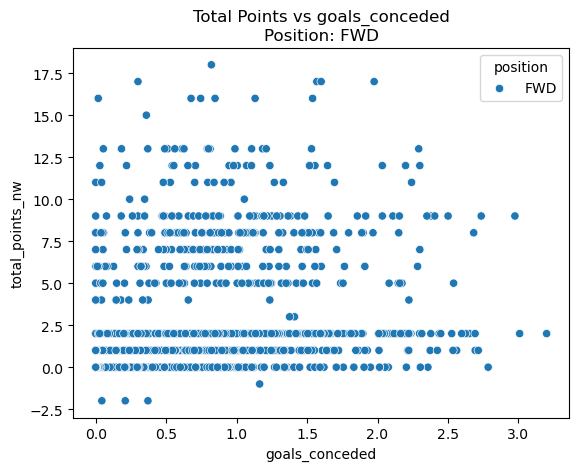

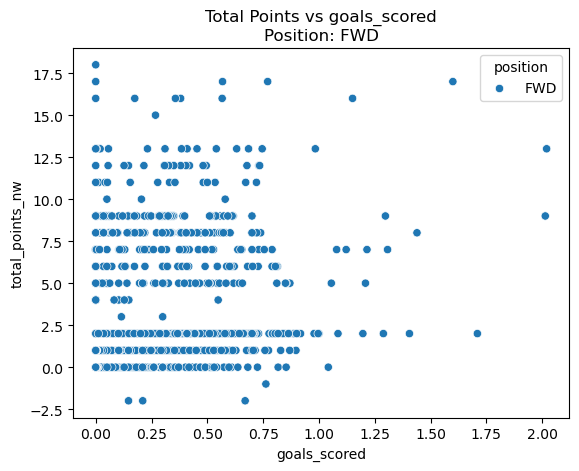

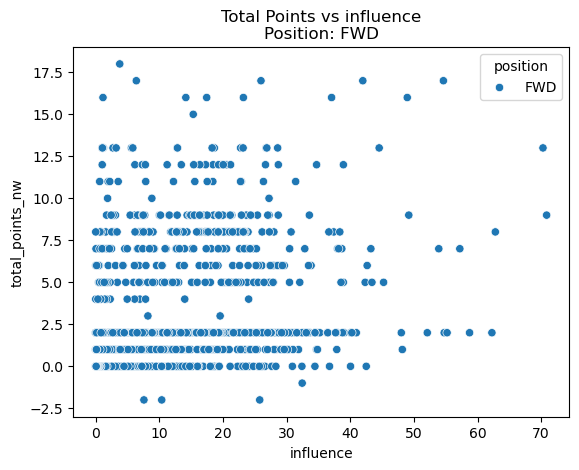

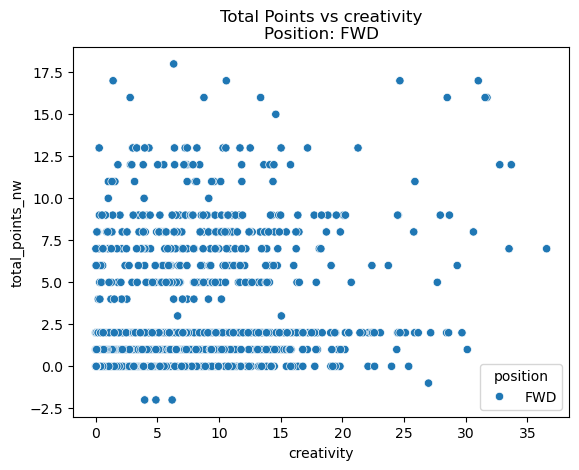

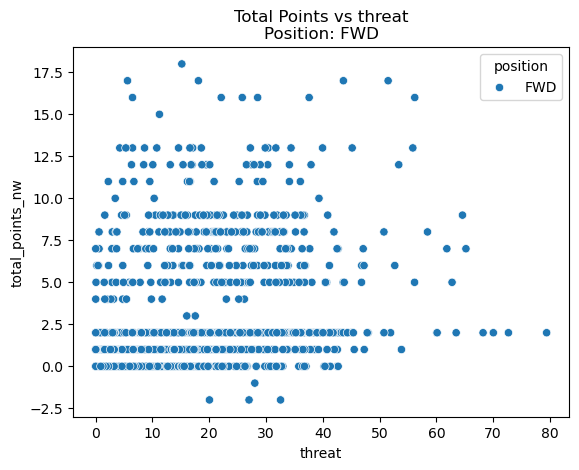

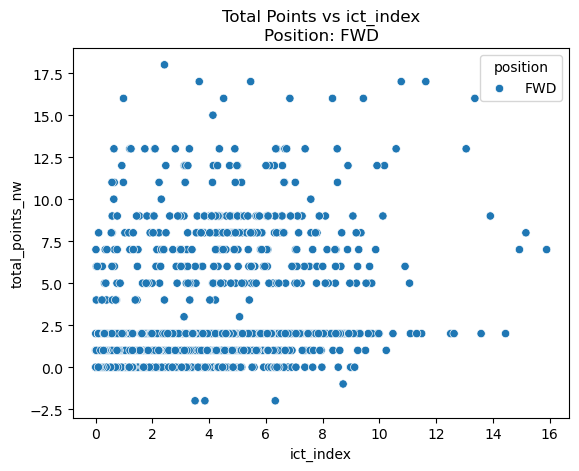

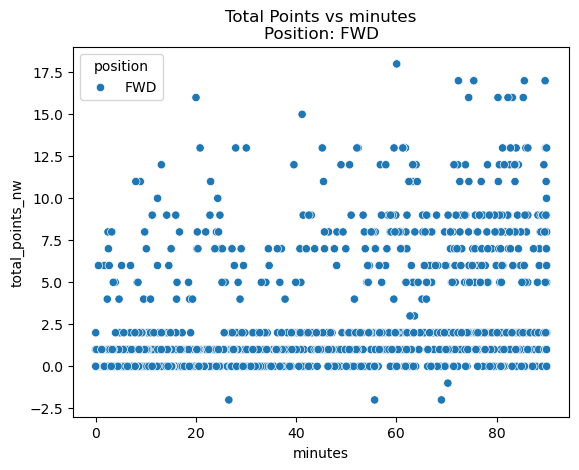

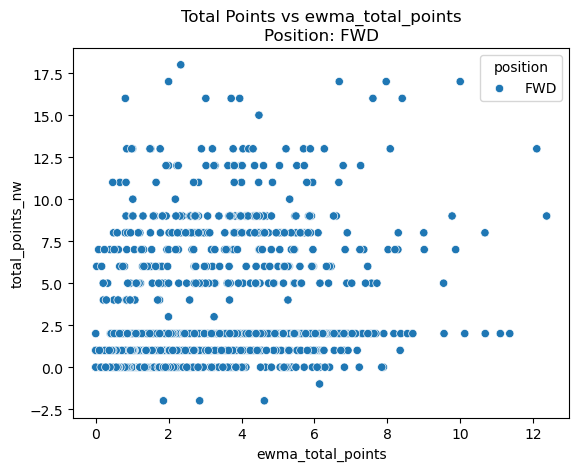

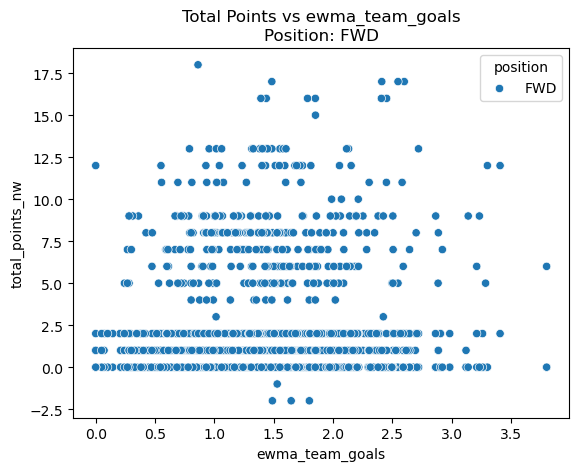

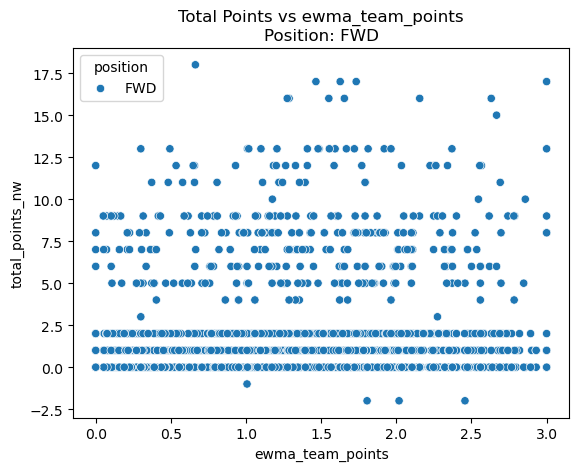

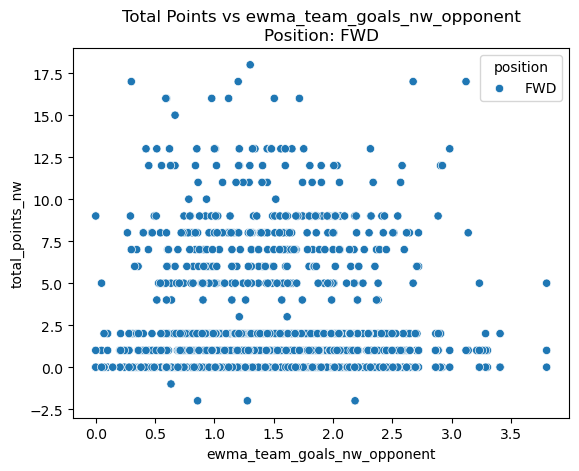

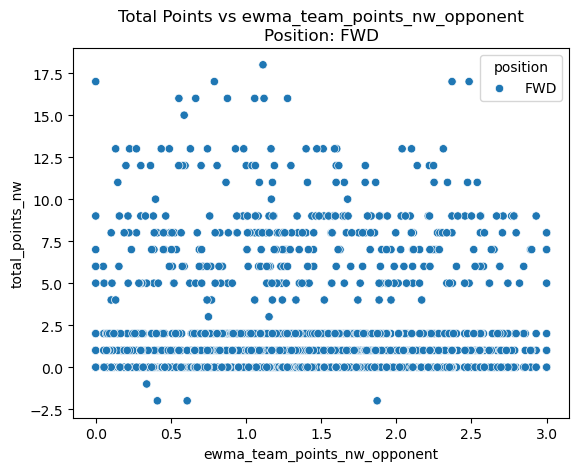

In [22]:
for pos in ['GK', 'DEF', 'MID', 'FWD']:
    training_df_pos = training_df.query('position==@pos')
    for feature in features:
        plt.figure(pos+feature)
        sns.scatterplot(data=training_df_pos, x=feature, y='total_points_nw', hue='position')
        plt.title(f'Total Points vs {feature}\nPosition: {pos}')
        plt.show()